# Cereals EDA

The data is from Kaggle [Cereals Dataset](https://www.kaggle.com/crawford/80-cereals). Here we perform EDA of 77 different cereals.

The various columns in the dataset are as follows:

- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type: cold/hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)

## Imports

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## The Data

In [126]:
cereals_df = pd.read_csv('cereal.csv')

In [127]:
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [128]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [129]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


## EDA

In [130]:
# check for null values
cereals_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [131]:
# number of unique values in each of the columns
cereals_df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [132]:
# unique values in mfr column
cereals_df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

Let us first look into the mfr column and see which manufacturer has many cereal varieties.

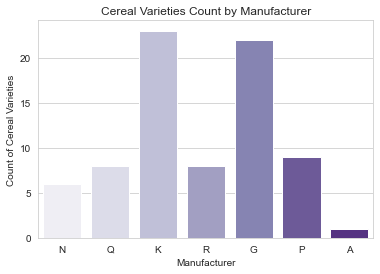

In [133]:
sns.set_style('whitegrid')
sns.countplot(data = cereals_df,
             x = 'mfr',
             palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Count of Cereal Varieties')
plt.title('Cereal Varieties Count by Manufacturer')
plt.show()

From the plot above it is clear that K (Kelloggs) and G (General Mills) have the highest varieties of cereals.

Next we analyse the type column.

In [134]:
cereals_df['type'].unique()

array(['C', 'H'], dtype=object)

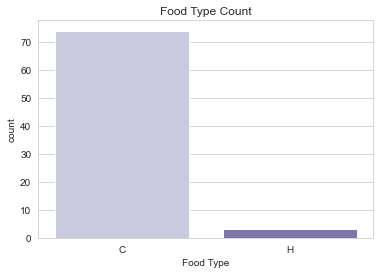

In [135]:
sns.countplot(data = cereals_df,
             x = 'type',
             palette = 'Purples')
plt.title('Food Type Count')
plt.xlabel('Food Type')
plt.show()

C (Cold) cereals seem more common than H (Hot) cereals.

We next look into the calories.

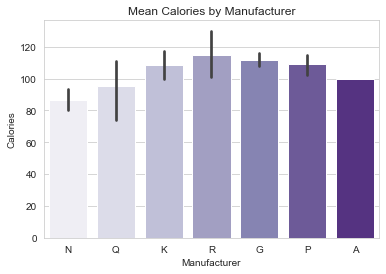

In [136]:
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'calories',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.title('Mean Calories by Manufacturer')
plt.show()

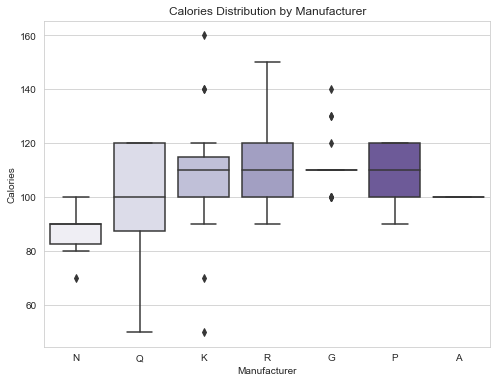

In [137]:
plt.figure(figsize=(8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'calories',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.title('Calories Distribution by Manufacturer')
plt.show()

The Ralston Purina (R) manufacturer has products with highest mean calories, with the median calories for Kelloggs (K), Ralston Purina (R), General Mills (G) and Post (P) being around the same.

Cereals by Nabisco (N) have the least mean and median calories, followed by Quaker Oats (Q).

Next we look into the top 10 cereals with the highest calorie count.

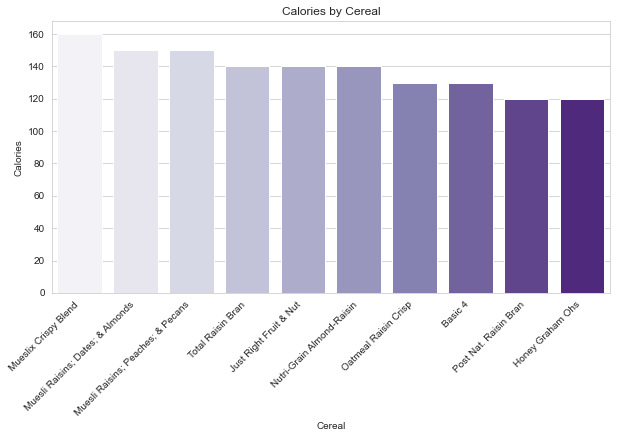

In [138]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'calories', ascending = False).head(10), 
            x = 'name', 
            y = 'calories',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Calories')
plt.title('Calories by Cereal')
plt.show()

Now let us look at the manufacturer of the top 10 cereals with highest calorie count.

In [139]:
cereals_df.sort_values(by = 'calories', ascending = False).head(10)[['name','mfr','calories']]

,name,mfr,calories
46,Mueslix Crispy Blend,K,160
44,Muesli Raisins; Dates; & Almonds,R,150
45,Muesli Raisins; Peaches; & Pecans,R,150
70,Total Raisin Bran,G,140
39,Just Right Fruit & Nut,K,140
49,Nutri-Grain Almond-Raisin,K,140
51,Oatmeal Raisin Crisp,G,130
7,Basic 4,G,130
52,Post Nat. Raisin Bran,P,120
35,Honey Graham Ohs,Q,120


We can see that the Kelloggs (K), General Mills (G) are the manufacturers with 3 products with high calories.

We next look into products with the lowest calories.

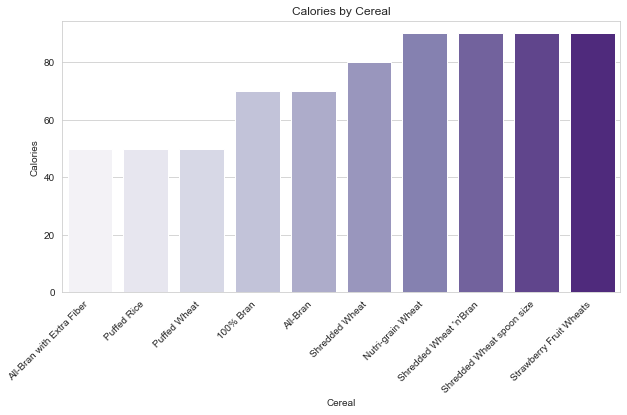

In [140]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'calories', ascending = True).head(10), 
            x = 'name', 
            y = 'calories',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Calories')
plt.title('Calories by Cereal')
plt.show()


Next we look into the protein in the cereals.

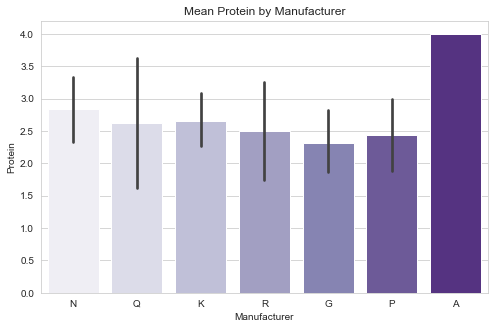

In [141]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'protein',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Protein')
plt.title('Mean Protein by Manufacturer')
plt.show()

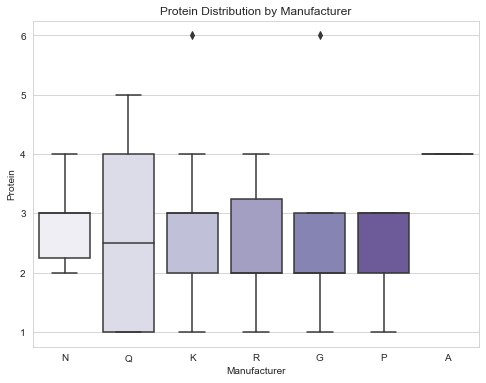

In [142]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'protein',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Protein')
plt.title('Protein Distribution by Manufacturer')
plt.show()

The mean and median protein is the highest for the cereals with American Home Food Products (A).

Let us see what are the cereals with the highest protein content.

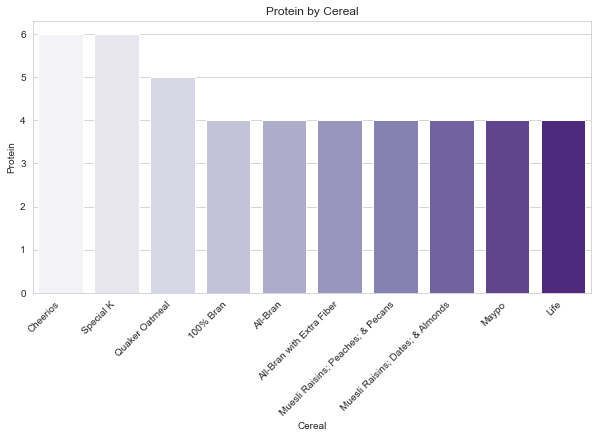

In [143]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'protein', ascending = False).head(10), 
            x = 'name', 
            y = 'protein',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Protein')
plt.title('Protein by Cereal')
plt.show()

Both Cheerios and Special K have the highest amount of protein.

We also look into cereals with low protein.

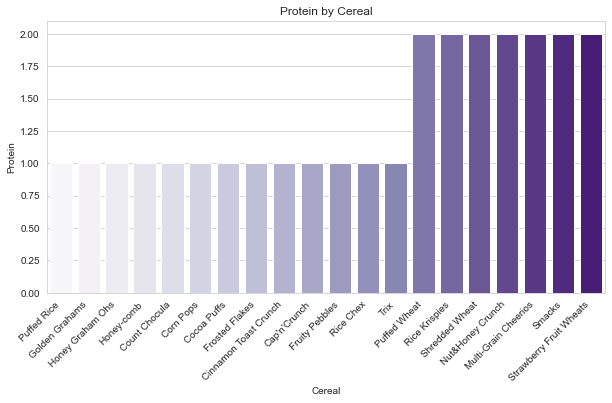

In [145]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'protein', ascending = True).head(20), 
            x = 'name', 
            y = 'protein',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Protein')
plt.title('Protein by Cereal')
plt.show()

There are 13 cereals with a protein value of just 1.

Next we look into the fat content in the cereals. Healthy cereals have low saturated fats.

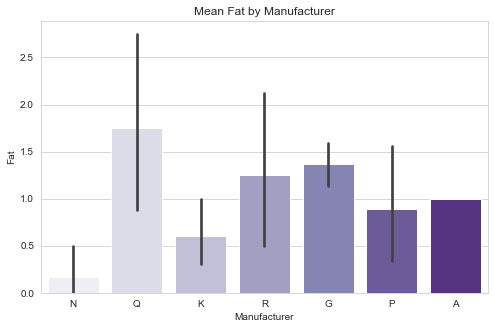

In [146]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'fat',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Fat')
plt.title('Mean Fat by Manufacturer')
plt.show()

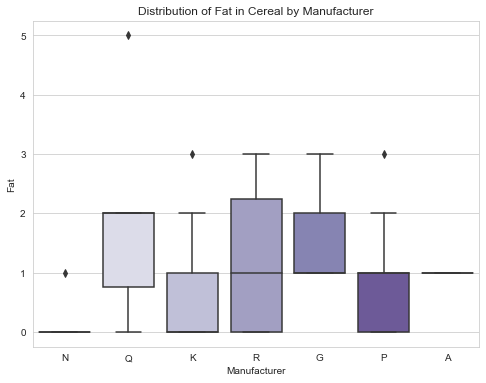

In [147]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'fat',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Fat')
plt.title('Distribution of Fat in Cereal by Manufacturer')
plt.show()

In [148]:
cereals_df.groupby('mfr')['fat'].median()

mfr
A    1
G    1
K    0
N    0
P    1
Q    2
R    1
Name: fat, dtype: int64

Quaker Oats (Q) have products with the highest mean and median fat content.

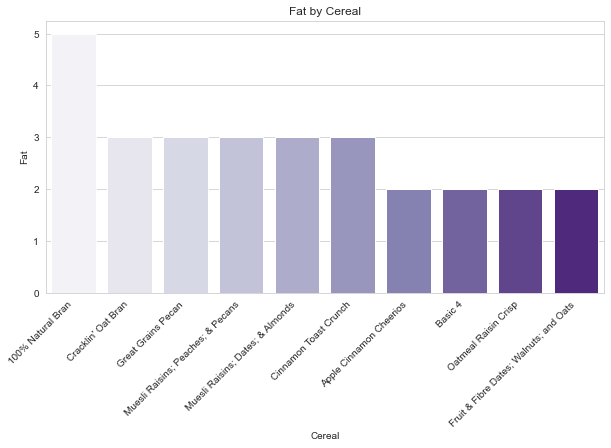

In [150]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'fat', ascending = False).head(10), 
            x = 'name', 
            y = 'fat',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Fat')
plt.title('Fat by Cereal')
plt.show()

In [151]:
cereals_df.sort_values(by = 'fat', ascending = False).head(10)[['name','mfr','fat']]

,name,mfr,fat
1,100% Natural Bran,Q,5
19,Cracklin' Oat Bran,K,3
34,Great Grains Pecan,P,3
45,Muesli Raisins; Peaches; & Pecans,R,3
44,Muesli Raisins; Dates; & Almonds,R,3
12,Cinnamon Toast Crunch,G,3
5,Apple Cinnamon Cheerios,G,2
7,Basic 4,G,2
51,Oatmeal Raisin Crisp,G,2
27,Fruit & Fibre Dates; Walnuts; and Oats,P,2


100% Natural Bran manufactured by Quaker Oats is the cereal with the highest fat content.

We next have a look into the cereals with the lowest fat content.

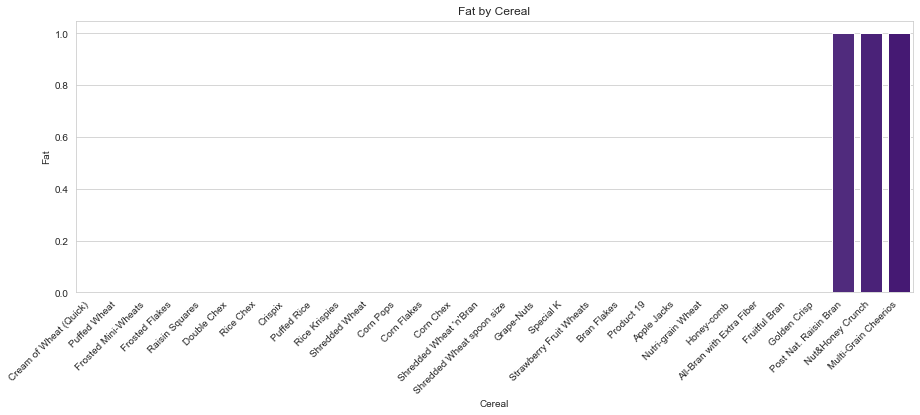

In [156]:
plt.figure(figsize = (15,5))
sns.barplot(data = cereals_df.sort_values(by = 'fat', ascending = True).head(30), 
            x = 'name', 
            y = 'fat',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Fat')
plt.title('Fat by Cereal')
plt.show()

There are 27 cereals with 0 fat content. Let us look into the manufacturer of these cereals.

In [162]:
cereals_df[cereals_df['fat'] == 0.0].groupby('mfr')[['name']].count()

,name
mfr,
K,13
N,5
P,4
Q,2
R,3


We have 13 cereals by Kellogg's (K) which have 0 fat content.

Let us next look at the sodium content in the cereal.

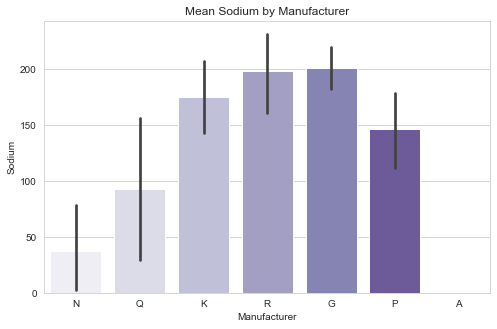

In [163]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'sodium',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Sodium')
plt.title('Mean Sodium by Manufacturer')
plt.show()

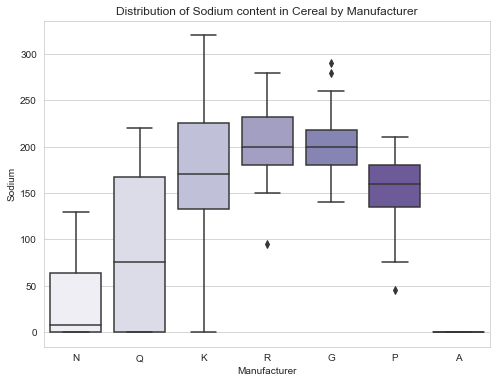

In [164]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'sodium',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Sodium')
plt.title('Distribution of Sodium content in Cereal by Manufacturer')
plt.show()

The mean and median sodium content is highest for the cereals manufactured by Ralston Purina (R) and General Mills (G). It can also be noticed that the mean and median sodium content is 0 for cereals manufactured by American Home Food Products (A).

We can next look into the top 10 cereals with the highest sodium content.

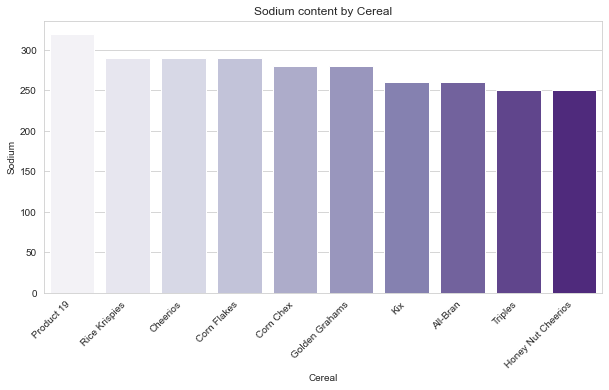

In [165]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'sodium', ascending = False).head(10), 
            x = 'name', 
            y = 'sodium',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Sodium')
plt.title('Sodium content by Cereal')
plt.show()

Product 19 seems to have the highest sodium content followed by Rice Krispies, Cheerios and Corn Flakes.

In [97]:
cereals_df.sort_values(by = 'sodium', ascending = False).head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.0,1.00,41.503540
62,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.0,1.00,40.560159
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.0,1.00,45.863324
15,Corn Chex,R,C,110,2,0,280,0.0,22.0,3,25,25,1,1.0,1.00,41.445019
31,Golden Grahams,G,C,110,1,1,280,0.0,15.0,9,45,25,2,1.0,0.75,23.804043
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.0,1.50,39.241114
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
36,Honey Nut Cheerios,G,C,110,3,1,250,1.5,11.5,10,90,25,1,1.0,0.75,31.072217


9 out of the top 10 cereals with highest sodium content are manufactured by Kelloggs (K) or General Mills (G).

We can also see which cereals are low in sodium content for a healthier option.

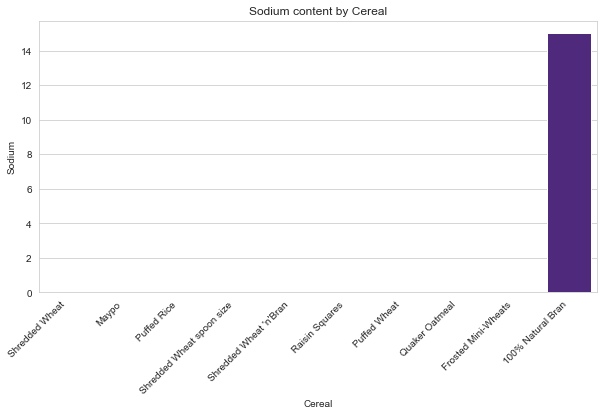

In [166]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'sodium', ascending = True).head(10), 
            x = 'name', 
            y = 'sodium',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Sodium')
plt.title('Sodium content by Cereal')
plt.show()

9 out of the 10 cereals have 0 sodium content which means they have 0 content.

In [167]:
cereals_df[cereals_df['sodium'] == 0.0].groupby('mfr')[['name']].count()

,name
mfr,
A,1
K,2
N,3
Q,3


Cereals by Nabisco (N) and Quaker Oats (Q) have 3 products with 0 sodium content.


Next we look into the fiber content in cereals.

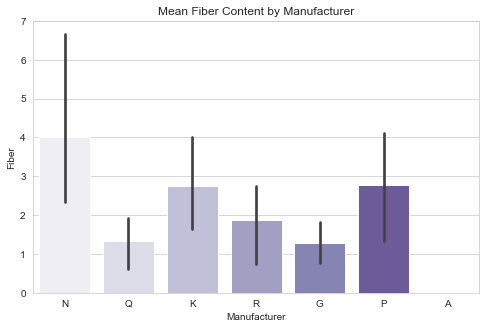

In [168]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'fiber',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Fiber')
plt.title('Mean Fiber Content by Manufacturer')
plt.show()

The mean fiber content is the highest in cereals manufactured by Nabisco (N).

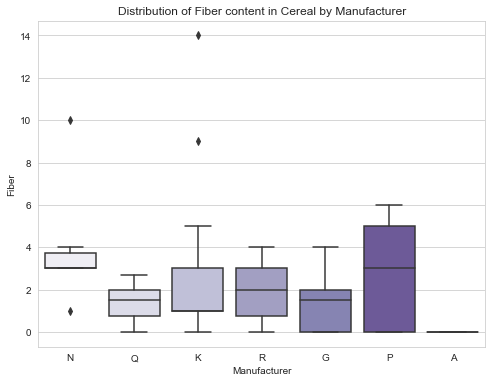

In [169]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'fiber',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Fiber')
plt.title('Distribution of Fiber content in Cereal by Manufacturer')
plt.show()

The median fiber content is the highest for cereals manufactured by Nabisco (N) and Post (P).

It can also be observed that the mean and median fiber content is 0 for cereals manufactured by American Home Food Products (A).

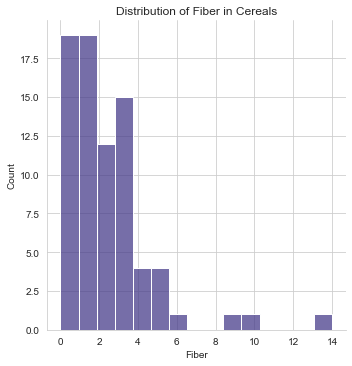

In [170]:
sns.displot(data = cereals_df,
            x = 'fiber', 
            color = 'darkslateblue')

plt.xlabel('Fiber')
plt.title('Distribution of Fiber in Cereals')
plt.show()

Fiber ranging between 0 to 4 for most of the cereals and there are very few cereals with fiber higher than 4.

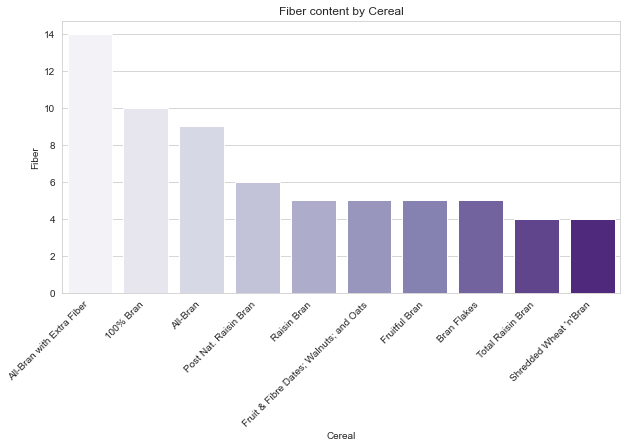

In [171]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'fiber', ascending = False).head(10), 
            x = 'name', 
            y = 'fiber',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Fiber')
plt.title('Fiber content by Cereal')
plt.show()

The above plot shows the products with the highest fiber content with 'All-Bran with Extra Fiber' and '100% Bran' containing significantly higher fiber content as compared to other cereals. It is also seen that 9 out of the top 10 cereals contain bran.

We can also look into cereals with low fiber content.

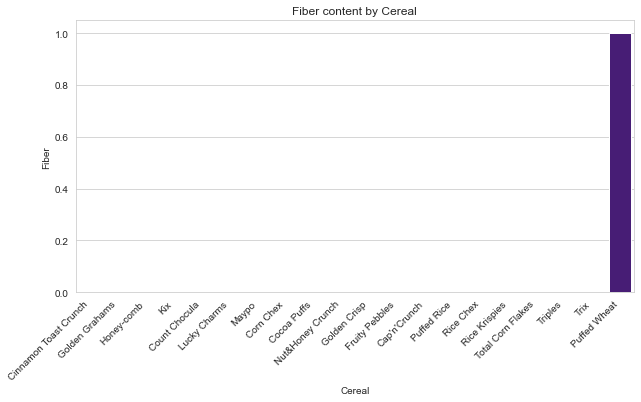

In [173]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'fiber', ascending = True).head(20), 
            x = 'name', 
            y = 'fiber',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Fiber')
plt.title('Fiber content by Cereal')
plt.show()

There are 19 cereals with 0 fiber content. Let us look into the manufacturers.

In [174]:
cereals_df[cereals_df['fiber'] == 0.0].groupby('mfr')[['name']].count()

,name
mfr,
A,1
G,9
K,2
P,3
Q,2
R,2


It can be noticed that there are 9 cereals by General Mills (G) which have 0 fiber content.


Next let us look at the carbohydrates in cereals by manufacturers.

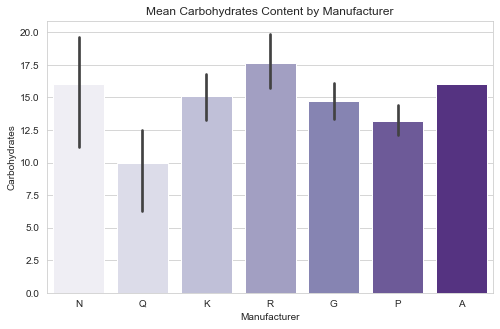

In [175]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'carbo',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Carbohydrates')
plt.title('Mean Carbohydrates Content by Manufacturer')
plt.show()

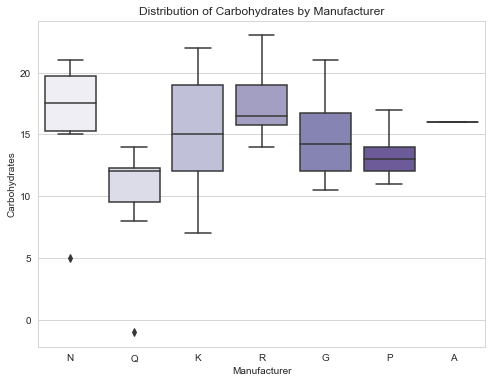

In [176]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'carbo',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Carbohydrates')
plt.title('Distribution of Carbohydrates by Manufacturer')
plt.show()

The mean carbohydrates are highest for cereals manufactured by Ralston Purina (R) and the median is the highest for Nabisco (N).

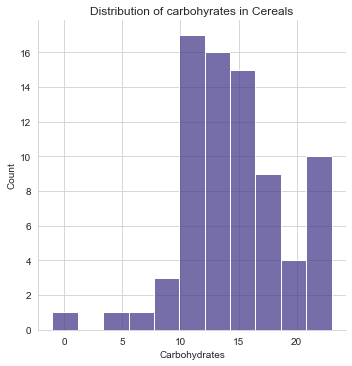

In [177]:
sns.displot(data = cereals_df,
            x = 'carbo', 
            color = 'darkslateblue')

plt.xlabel('Carbohydrates')
plt.title('Distribution of carbohyrates in Cereals')
plt.show()

Most of the cereals have carbohyrates between 10 and 15 and there is 1 cereal with 0 or less carbohydrates.

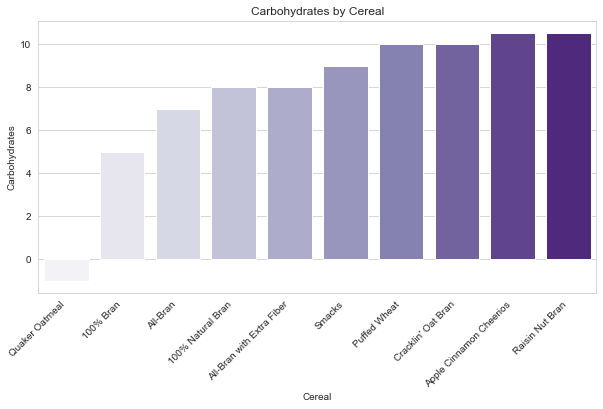

In [178]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'carbo', ascending = True).head(10), 
            x = 'name', 
            y = 'carbo',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Carbohydrates')
plt.title('Carbohydrates by Cereal')
plt.show()

Quaker Oatmeal seems to have negative carbs which is incorrect. 

In [181]:
cereals_df[cereals_df['carbo'] <= 10.0].groupby('mfr')[['name']].count()

,name
mfr,
K,4
N,1
Q,3


Kellogg's (K) has 4 products with low carbohydrates.

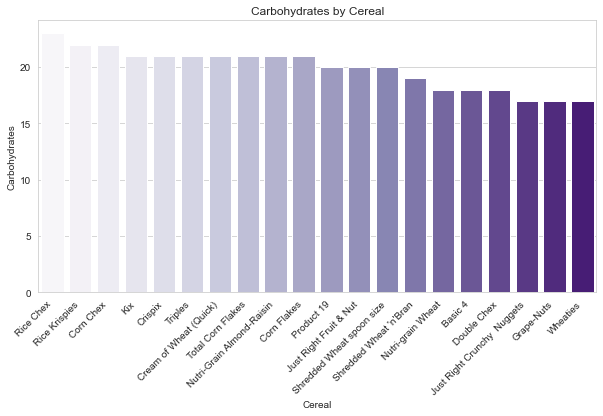

In [182]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'carbo', ascending = False).head(20), 
            x = 'name', 
            y = 'carbo',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Carbohydrates')
plt.title('Carbohydrates by Cereal')
plt.show()

The carbohydrates is the highest in Rice Chex but it is in the similar range for the first 13 cereals in the plot where the carbohydrates is 20 or more.

Let us look at the manufacturers for these cereals.

In [183]:
cereals_df[cereals_df['carbo'] >= 20.0].groupby('mfr')[['name']].count()

,name
mfr,
G,3
K,6
N,2
R,2


We can observe that there are 6 cereals by Kellogg's which are high in carbohydrates.

Next we analyse the sugars in cereals.

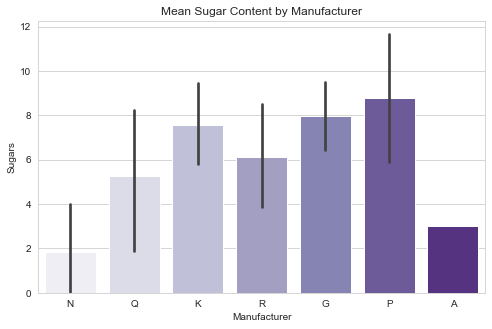

In [184]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'sugars',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Sugars')
plt.title('Mean Sugar Content by Manufacturer')
plt.show()

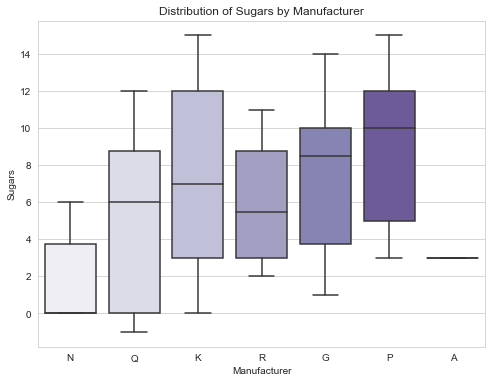

In [185]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'sugars',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Sugars')
plt.title('Distribution of Sugars by Manufacturer')
plt.show()

The mean and median sugars are highest in cereals manufactured by Post (P) and lowest for Nabisco (N).

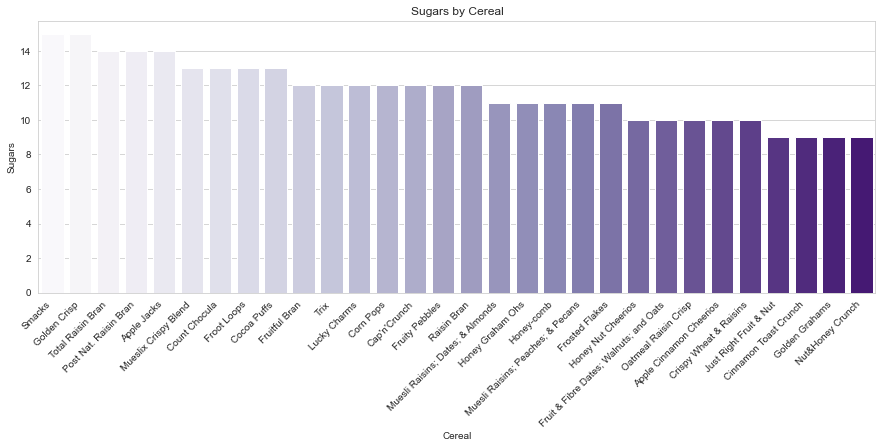

In [188]:
plt.figure(figsize = (15,5))
sns.barplot(data = cereals_df.sort_values(by = 'sugars', ascending = False).head(30), 
            x = 'name', 
            y = 'sugars',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Sugars')
plt.title('Sugars by Cereal')
plt.show()

The sugars are highest in Smacks and Golden Crisp. Let us have a look at the manufacturers of all cereals where the sugars are 10 or higher.


In [189]:
cereals_df[cereals_df['sugars'] >= 10.0].groupby('mfr')[['name']].count()

,name
mfr,
G,9
K,8
P,5
Q,2
R,2


General Mills (G) has 9 cereals and Kellogg's (K) has 8 cereals with sugars 10 or more.


Let us look at the cereals with the lowest sugar content.

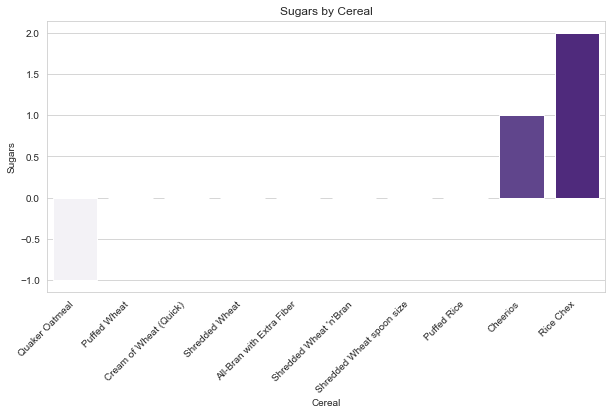

In [190]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'sugars', ascending = True).head(10), 
            x = 'name', 
            y = 'sugars',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Sugars')
plt.title('Sugars by Cereal')
plt.show()

There seems to be a negative value in sugar content for Quaker Oatmeal which is incorrect and instead has to be 0. There are 7 cereals whose sugars are 0.

In [191]:
cereals_df[cereals_df['sugars'] <= 0.0][['name', 'mfr']]

,name,mfr
3,All-Bran with Extra Fiber,K
20,Cream of Wheat (Quick),N
54,Puffed Rice,Q
55,Puffed Wheat,Q
57,Quaker Oatmeal,Q
63,Shredded Wheat,N
64,Shredded Wheat 'n'Bran,N
65,Shredded Wheat spoon size,N


There are 4 cereals by Nabisco (N) with 0 sugar content.

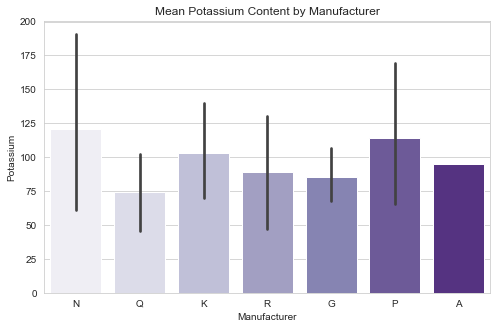

In [192]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'potass',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Potassium')
plt.title('Mean Potassium Content by Manufacturer')
plt.show()

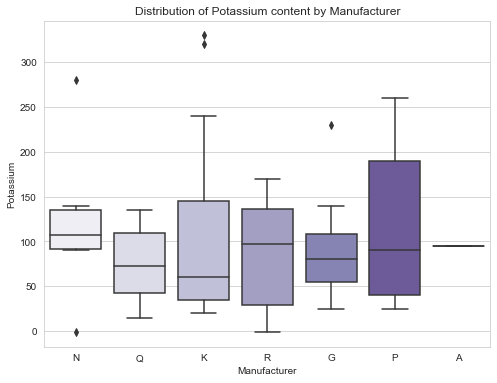

In [193]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'potass',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Potassium')
plt.title('Distribution of Potassium content by Manufacturer')
plt.show()

The mean and median potassium is highest in cereals manufactured by Nabisco (N).

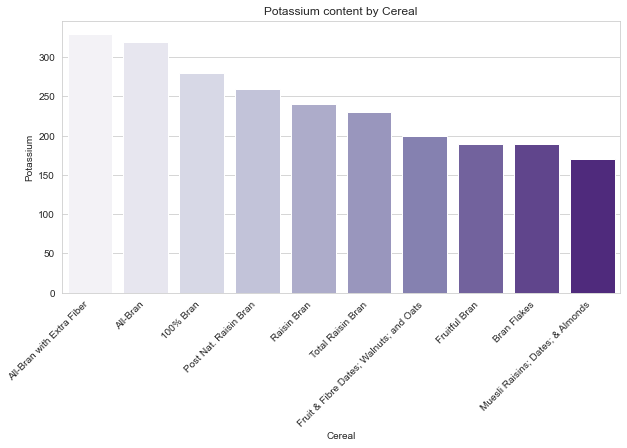

In [194]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'potass', ascending = False).head(10), 
            x = 'name', 
            y = 'potass',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Potassium')
plt.title('Potassium content by Cereal')
plt.show()

Cereals containing bran seem to have a high potassium content as well.

In [198]:
cereals_df[cereals_df['potass'] >= 150.0].groupby('mfr')[['name']].count()

,name
mfr,
G,1
K,6
N,1
P,3
R,2


If we look at the cereals with a potassium higher than 150 then we can observe that there are 6 cereals by Kellogg's (K).

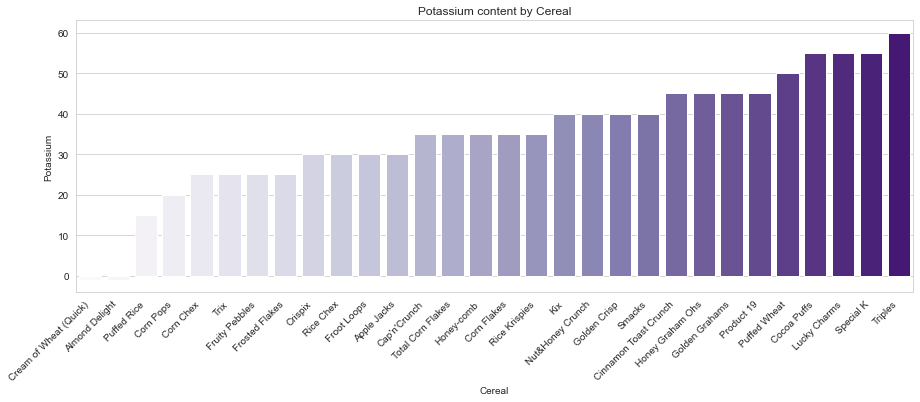

In [199]:
plt.figure(figsize = (15,5))
sns.barplot(data = cereals_df.sort_values(by = 'potass', ascending = True).head(30), 
            x = 'name', 
            y = 'potass',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Potassium')
plt.title('Potassium content by Cereal')
plt.show()

If we look at cereals with low potassium, there are 2 cereals with seemingly negative potassium levels which is incorrect and has to be 0 instead. There are 26 cereals with a potassium of 50 or lower.

In [200]:
cereals_df[cereals_df['potass'] <= 50.0].groupby('mfr')[['name']].count()

,name
mfr,
G,5
K,10
N,1
P,3
Q,4
R,3


Even in the low potassium category, Kellogg's (K) seems to have many cereals.

Next let us look into the vitamins in the cereals.

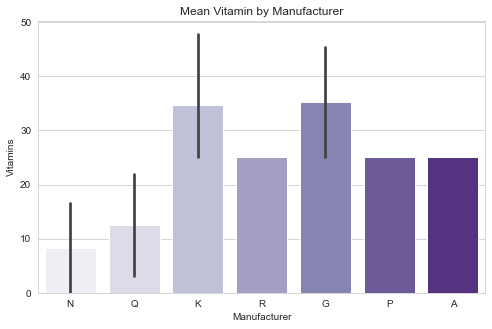

In [201]:
plt.figure(figsize = (8,5))
sns.barplot(data = cereals_df,
            x = 'mfr',
            y = 'vitamins',
            palette = 'Purples')

plt.xlabel('Manufacturer')
plt.ylabel('Vitamins')
plt.title('Mean Vitamin by Manufacturer')
plt.show()

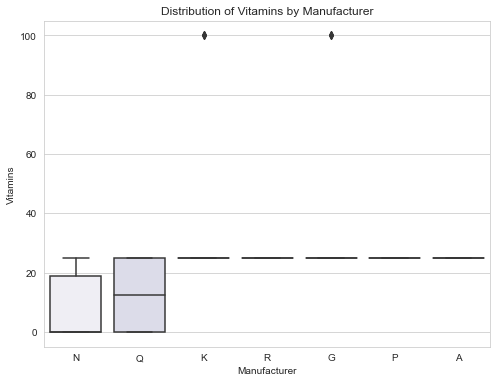

In [202]:
plt.figure(figsize = (8,6))
sns.boxplot(data = cereals_df,
            x = 'mfr',
            y = 'vitamins',
            palette = 'Purples')
plt.xlabel('Manufacturer')
plt.ylabel('Vitamins')
plt.title('Distribution of Vitamins by Manufacturer')
plt.show()

The mean vitamins are highest in cereals with manufacturers General Mills (G) and Kelloggs (K) but the median vitamins are the same for Kelloggs, Ralston Purina, General Mills, Post and American Home Food Products.

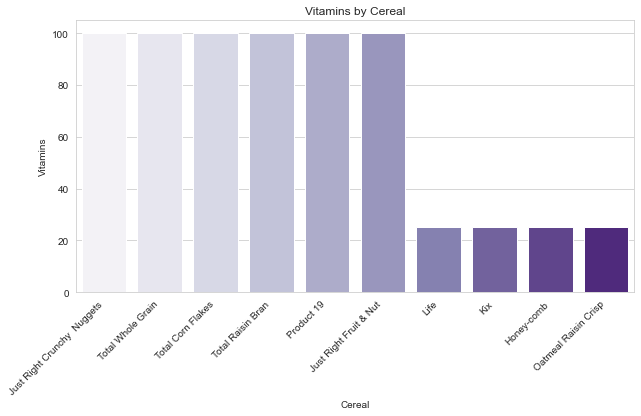

In [204]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'vitamins', ascending = False).head(10), 
            x = 'name', 
            y = 'vitamins',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Vitamins')
plt.title('Vitamins by Cereal')
plt.show()

The top 6 cereals have 100% vitamins. Let us look at the manufacturers of these cereals.

In [205]:
cereals_df.sort_values(by = 'vitamins', ascending = False).head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
38,Just Right Crunchy Nuggets,K,C,110,2,1,170,1.0,17.0,6,60,100,3,1.00,1.00,36.523683
71,Total Whole Grain,G,C,100,3,1,200,3.0,16.0,3,110,100,3,1.00,1.00,46.658844
69,Total Corn Flakes,G,C,110,2,1,200,0.0,21.0,3,35,100,3,1.00,1.00,38.839746
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.00,1.00,41.503540
39,Just Right Fruit & Nut,K,C,140,3,1,170,2.0,20.0,9,95,100,3,1.30,0.75,36.471512
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114
37,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414
51,Oatmeal Raisin Crisp,G,C,130,3,2,170,1.5,13.5,10,120,25,3,1.25,0.50,30.450843


We can see that they are manufactured by Kelloggs (K) or General Mills (G). Let us look at the lowest vitamin content cereals.

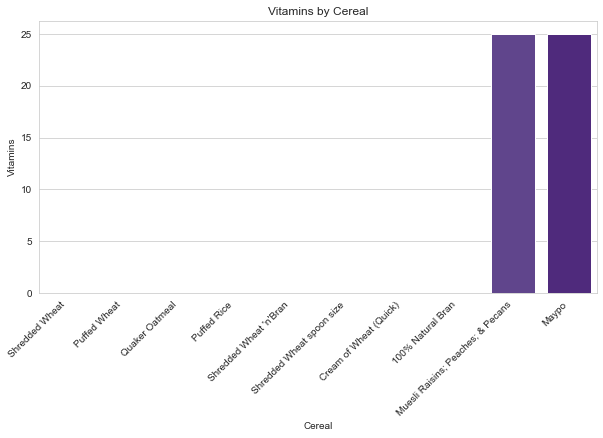

In [206]:
plt.figure(figsize = (10,5))
sns.barplot(data = cereals_df.sort_values(by = 'vitamins', ascending = True).head(10), 
            x = 'name', 
            y = 'vitamins',
            palette = 'Purples')

plt.xticks(rotation = 45,
           horizontalalignment='right')
plt.xlabel('Cereal')
plt.ylabel('Vitamins')
plt.title('Vitamins by Cereal')
plt.show()

There are 8 cereals which have 0% vitamins.


In [207]:
cereals_df[cereals_df['vitamins'] == 0.0].groupby('mfr')[['name']].count()

,name
mfr,
N,4
Q,4


There are 4 cereals each by Nabisco (N) and Quaker Oats (Q) which have 0 vitamins.


Let us look at the number of cereals by shelf.

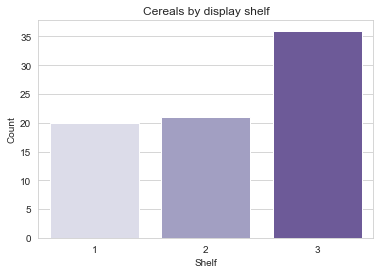

In [208]:
plt.figure(figsize = (6,4))
sns.countplot(data = cereals_df, 
             x = 'shelf',
             palette = 'Purples')

plt.xlabel('Shelf')
plt.ylabel('Count')
plt.title('Cereals by display shelf')
plt.show()

Shelf 3 seems to have the maximum varieties of cereals.

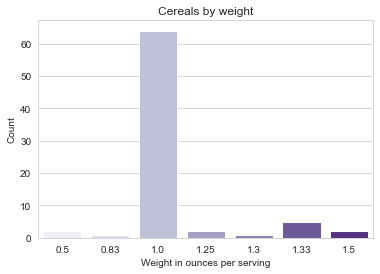

In [209]:
sns.countplot(data = cereals_df, 
              x = 'weight', 
              palette = 'Purples')

plt.xlabel('Weight in ounces per serving')
plt.ylabel('Count')
plt.title('Cereals by weight')
plt.show()

The weight is 1 ounce for most of the cereals.

Let us next look at the number of cups per serving.

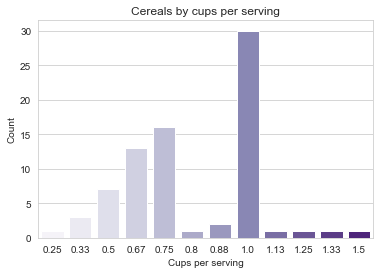

In [210]:
sns.countplot(data = cereals_df, 
              x = 'cups', 
              palette = 'Purples')

plt.xlabel('Cups per serving')
plt.ylabel('Count')
plt.title('Cereals by cups per serving')
plt.show()

30 cereals have 1 cup per serving which there are considerable number of cereals which have less than 1 cup per serving. And there are a few cereals which are more than 1 cup per serving.

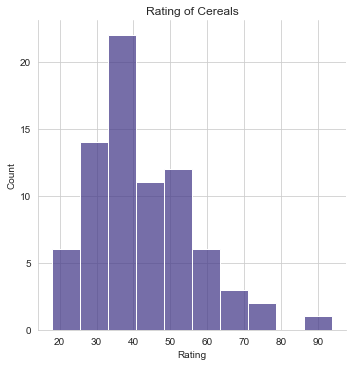

In [211]:
sns.displot(data = cereals_df, 
           x = 'rating',
           color = 'darkslateblue'
           )

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating of Cereals')
plt.show()

We observe that for most of the cereals the rating varies between 30 and 50 with the peak between 30 and 40.

In [212]:
cereals_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')